# <span style="color:blue">EDA Project - Analysis of AMCAT Data</span>

## <span style="color:red">Columns Summary Table for dataset</span>

* ID: Candidate ID
* Salary: Salary of the candidate
* DOJ: Date of joining the job
* DOL: Date of leaving the job
* Designation: Job designation/title
* JobCity: City where the job is located
* Gender: Gender of the candidate
* DOB: Date of birth of the candidatem
* 10percentage: Percentage score in 10th grade
* 12percentage: Percentage score in 12th grade
* CollegeID: College ID of the candidate
* CollegeTier: Tier of the college
* Degree: Degree pursued by the candidate
* Specialization: Specialization pursued by the candidate
* CollegeGPA: Grade Point Average in college
* CollegeCityID: ID of the college city
* CollegeCityTier: Tier of the college city
* CollegeState: State where the college is located
* GraduationYear: Year of graduation
* Domain: Domain knowledge score
* ComputerProgramming: Score in computer programming
* ElectronicsAndSemicon: Score in electronics and semiconductors
* ComputerScience: Score in computer science
* MechanicalEngg: Score in mechanical engineering
* ElectricalEngg: Score in electrical engineering
* TelecomEngg: Score in telecommunications engineering
* CivilEngg: Score in civil engineering
* Conscientiousness, Agreeableness, Extraversion, Neuroticism, Openness_to_experience: Personality trait scores

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

In [5]:
df = pd.read_excel('data.xlsx')


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [7]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [6]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
df.shape

(3998, 38)

In [9]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [11]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# Check for missing values
missing_val = df.isnull().sum()
missing_val

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [13]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## <span style="color:red">Univariate Analysis</span>

In [14]:
 df['Salary']

0        420000
1        500000
2        325000
3       1100000
4        200000
         ...   
3993     280000
3994     100000
3995     320000
3996     200000
3997     400000
Name: Salary, Length: 3998, dtype: int64

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

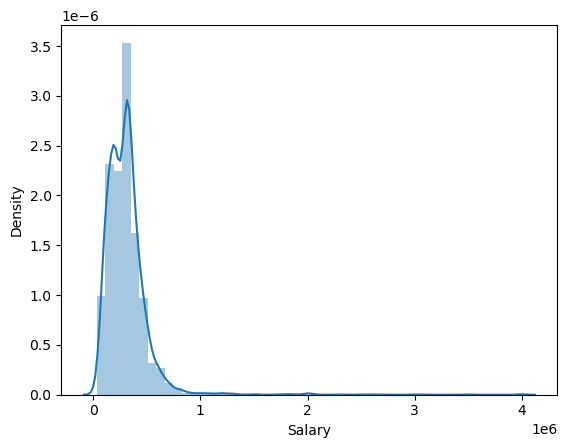

In [15]:
sns.distplot(df['Salary'])

* From above graph we can observe there is a outlier, Salary >10,00,000 is very rare, especially in the first job. So these are considered as outliers and removed.

In [16]:
# Initialize a dictionary to store the count of rows for each salary threshold
salary_counts = {250000 * i: (df['Salary'] <= 250000 * i).sum() for i in range(1, 8)}

# Print the counts for each threshold
for threshold, count in salary_counts.items():
    print(f"Number of Rows in dataframe in which Salary <= {threshold}: {count}")

Number of Rows in dataframe in which Salary <= 250000: 1710
Number of Rows in dataframe in which Salary <= 500000: 3683
Number of Rows in dataframe in which Salary <= 750000: 3929
Number of Rows in dataframe in which Salary <= 1000000: 3962
Number of Rows in dataframe in which Salary <= 1250000: 3975
Number of Rows in dataframe in which Salary <= 1500000: 3981
Number of Rows in dataframe in which Salary <= 1750000: 3982


In [17]:
indexNames = df[ df['Salary'] > 1000000 ].index 
# Delete these row indexes from dataFrame 
df.drop(indexNames , inplace=True) 
df.shape

(3962, 38)

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


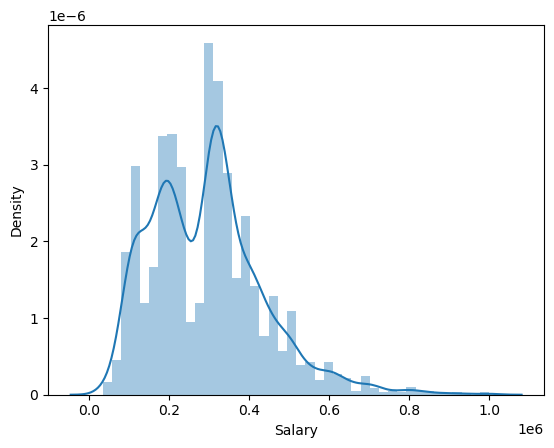

In [18]:
 sns.distplot(df['Salary']);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


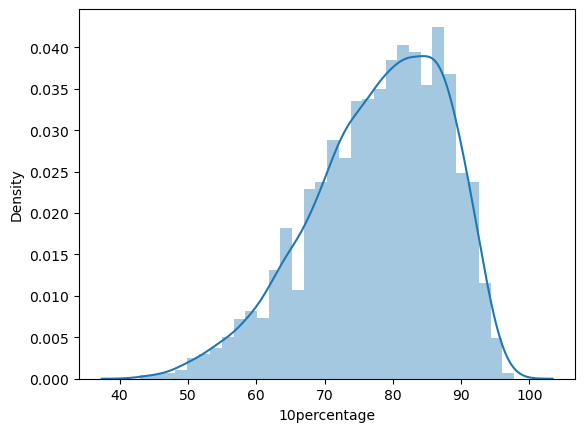

In [19]:
sns.distplot(df["10percentage"]);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


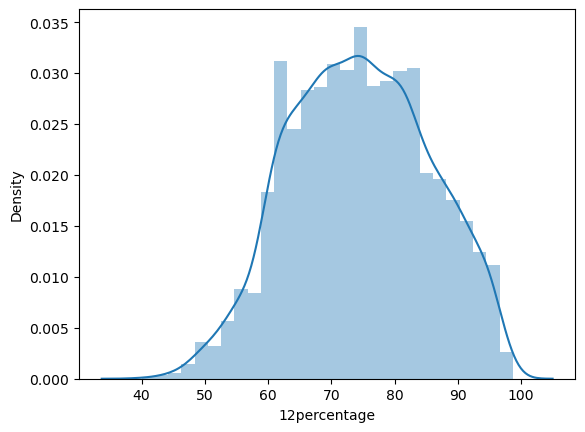

In [20]:
sns.distplot(df["12percentage"]);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


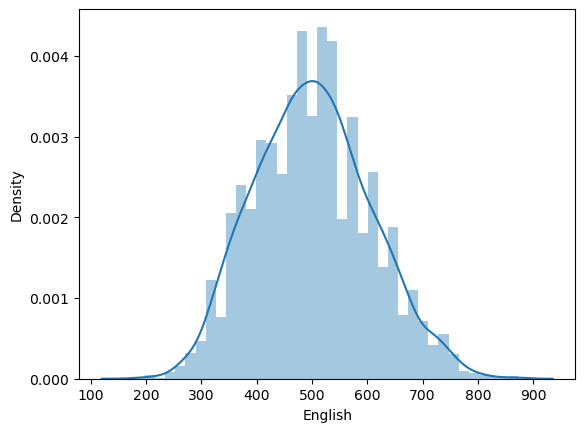

In [21]:
sns.distplot(df["English"]);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


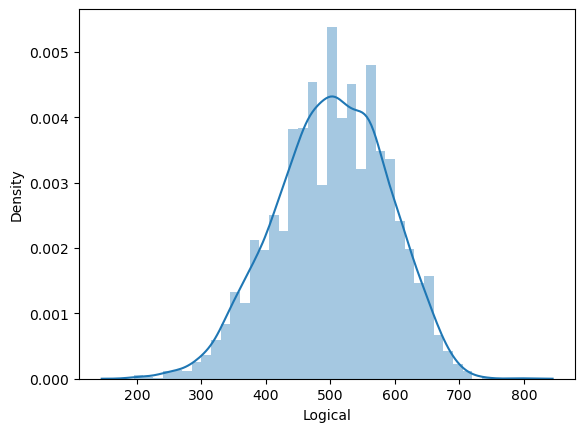

In [22]:
sns.distplot(df["Logical"]);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


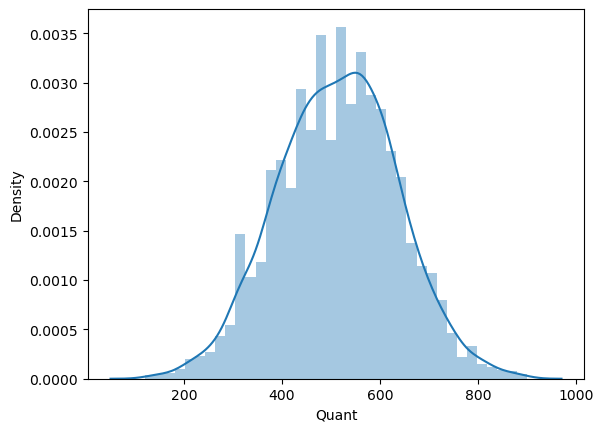

In [23]:
sns.distplot(df["Quant"]);

B:\Data Science doc\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


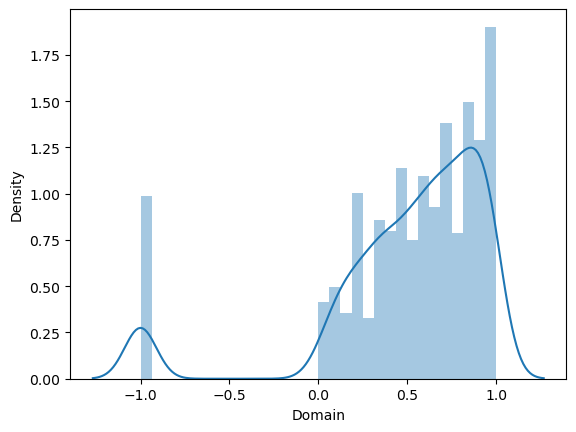

In [24]:
 sns.distplot(df["Domain"]);

<AxesSubplot:xlabel='Gender', ylabel='count'>

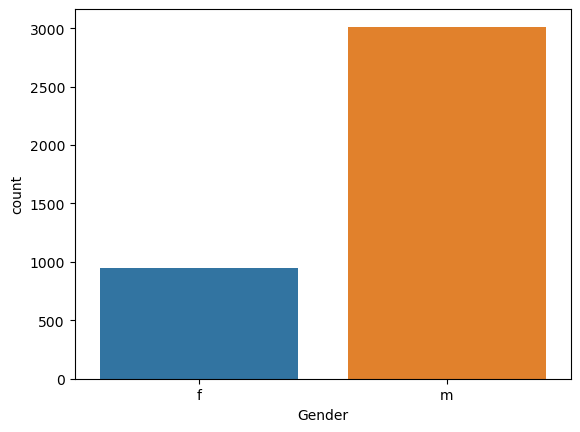

In [25]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='CollegeTier', ylabel='count'>

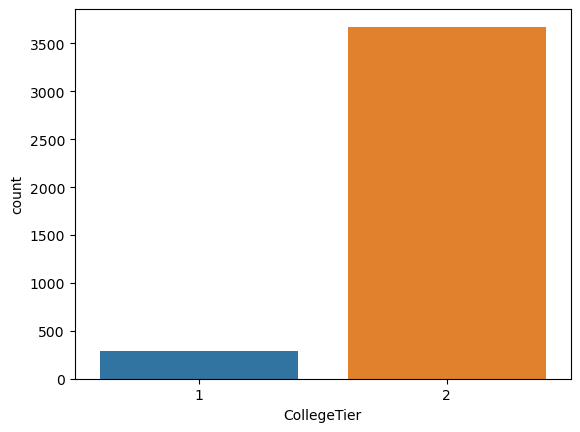

In [26]:
 sns.countplot(x='CollegeTier',data=df)

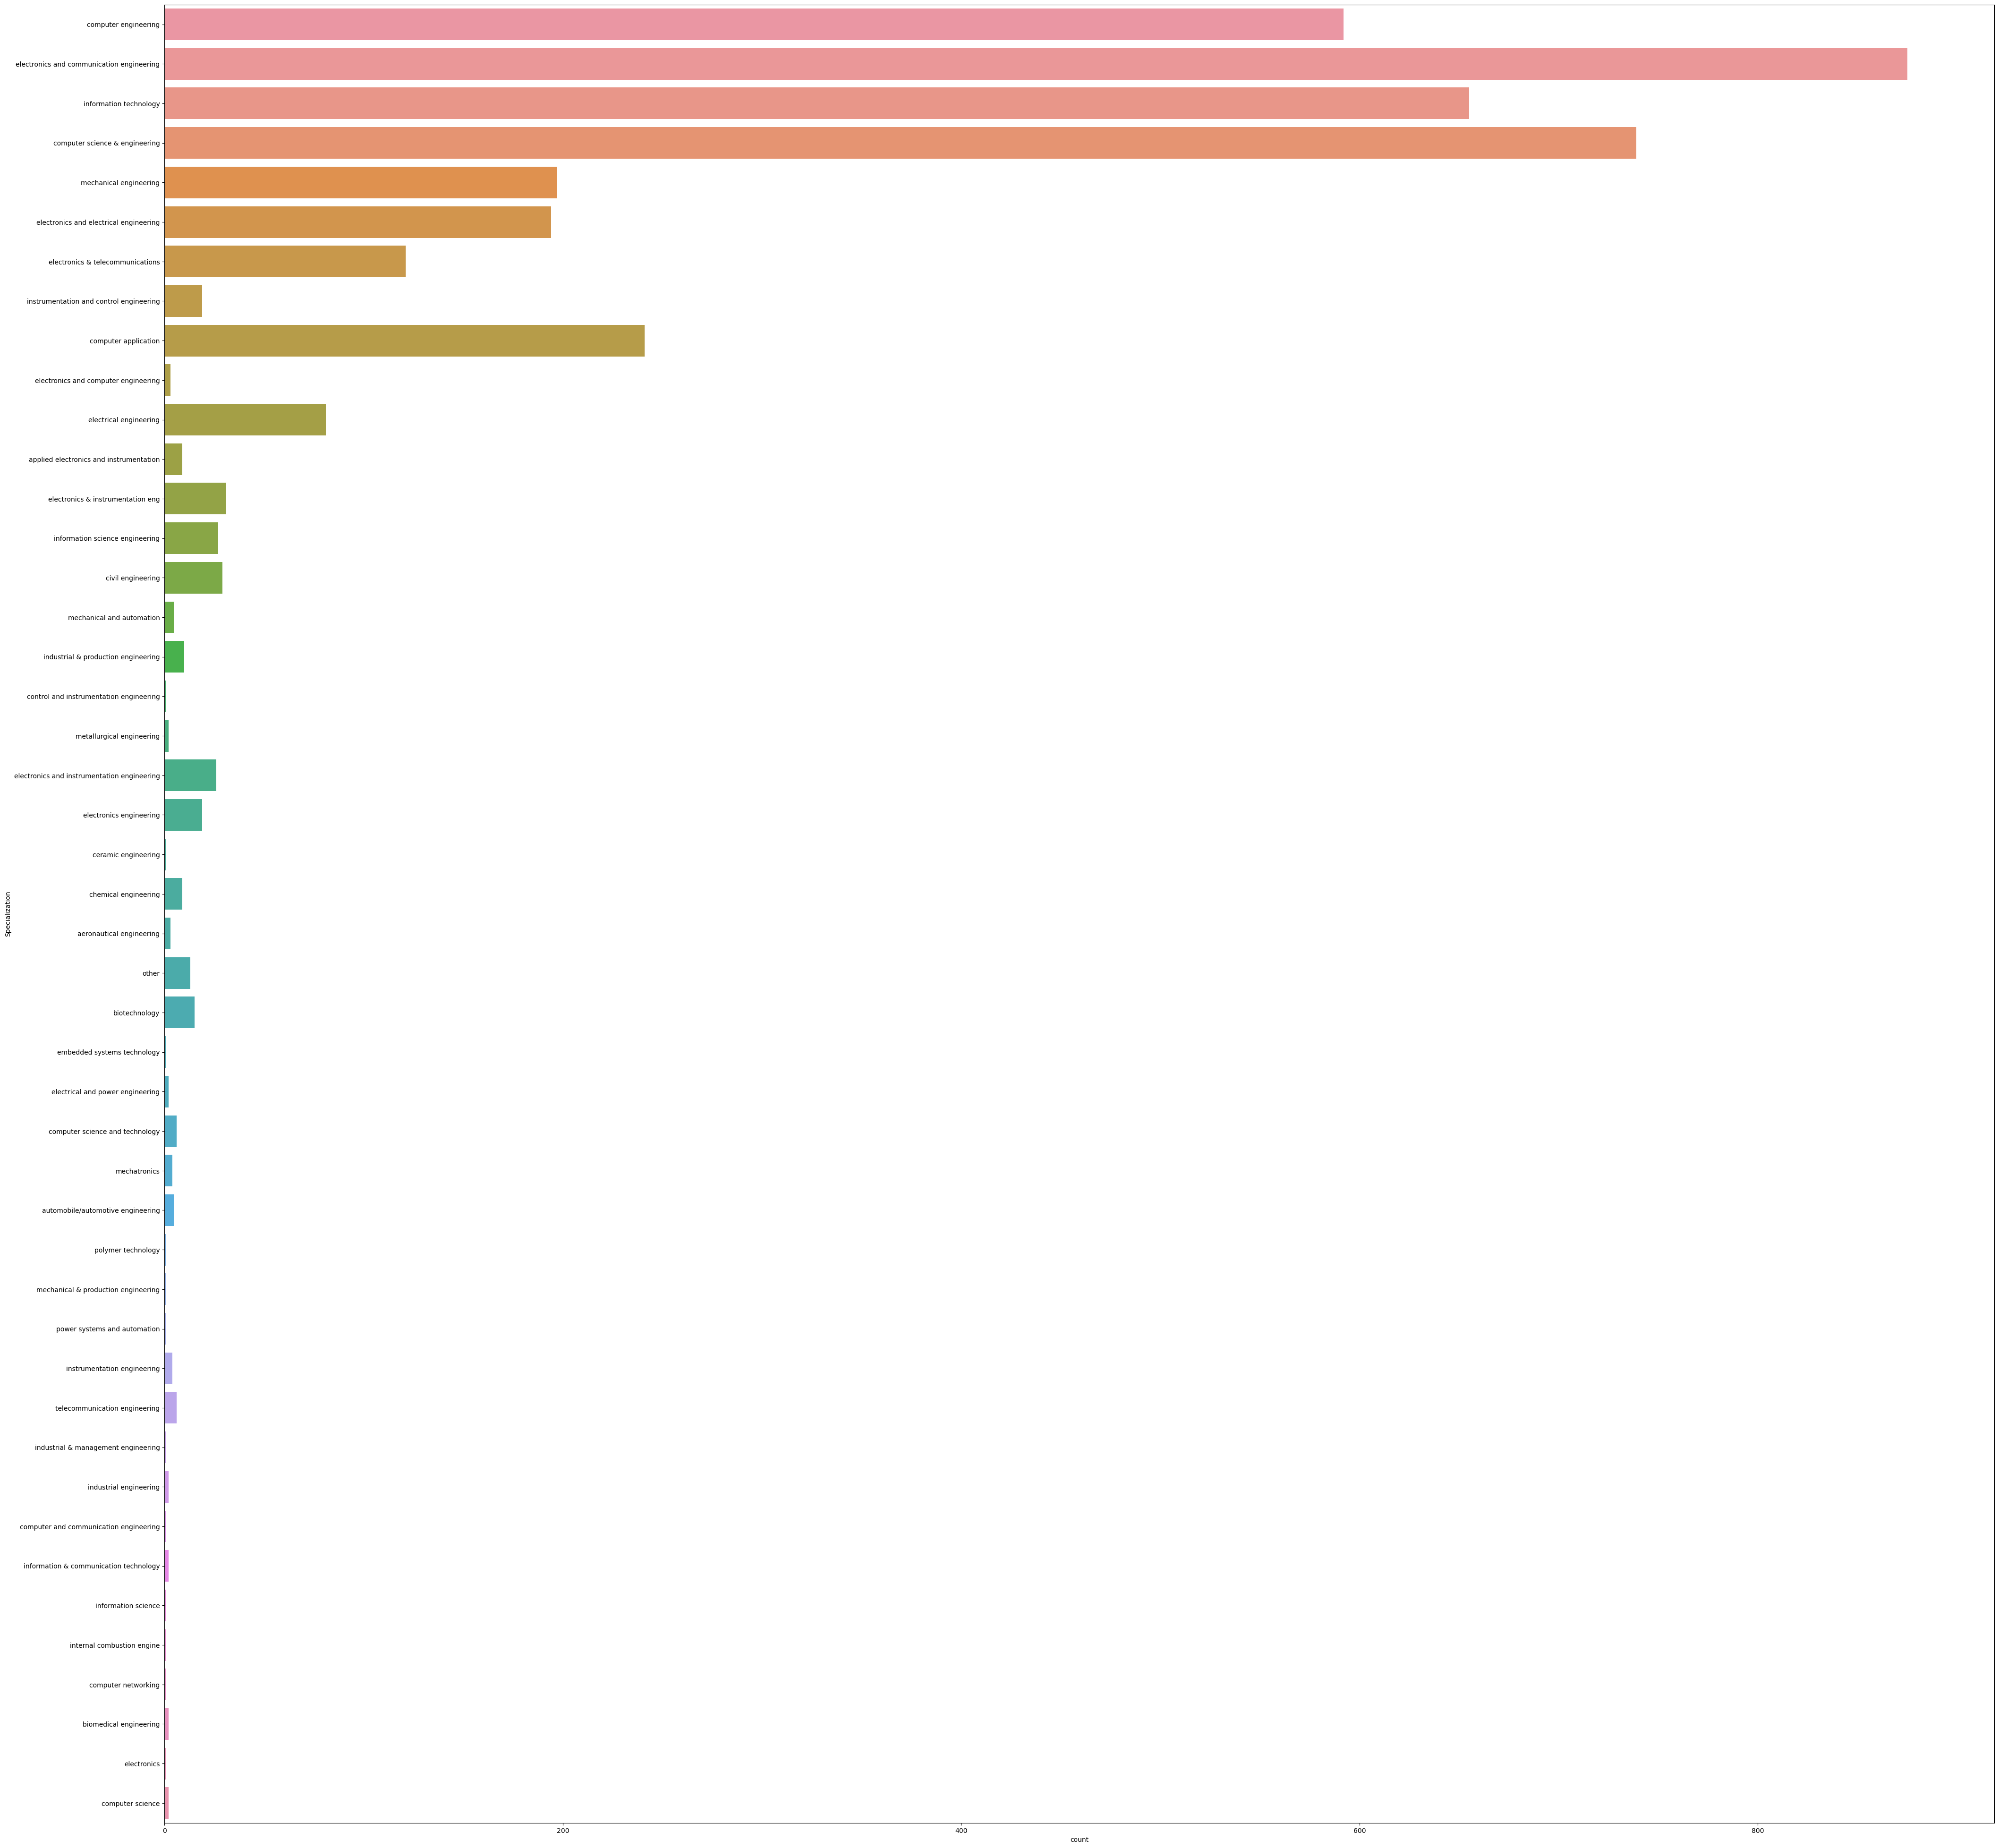

In [27]:
plt.figure(figsize=(50, 50)) 
ax = sns.countplot(y="Specialization", data=df)

<AxesSubplot:xlabel='CollegeCityTier', ylabel='count'>

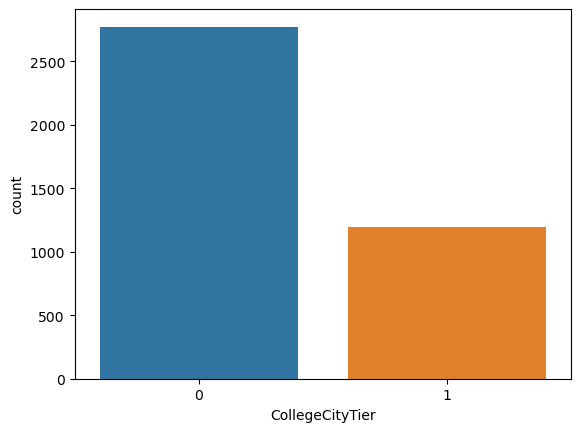

In [28]:
sns.countplot(x='CollegeCityTier',data=df)

<AxesSubplot:>

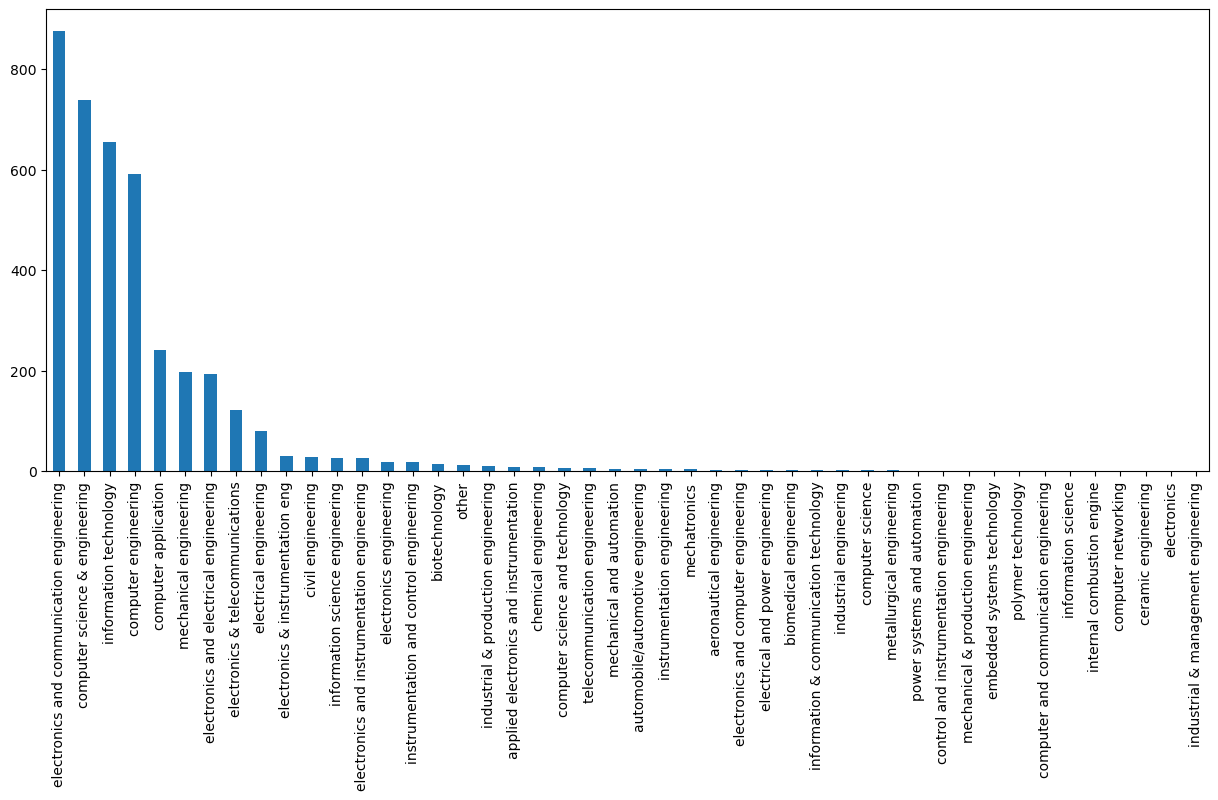

In [30]:
specialization_freq = df['Specialization'].value_counts() 
specialization_freq.plot(kind='bar', figsize=(15,6)) 

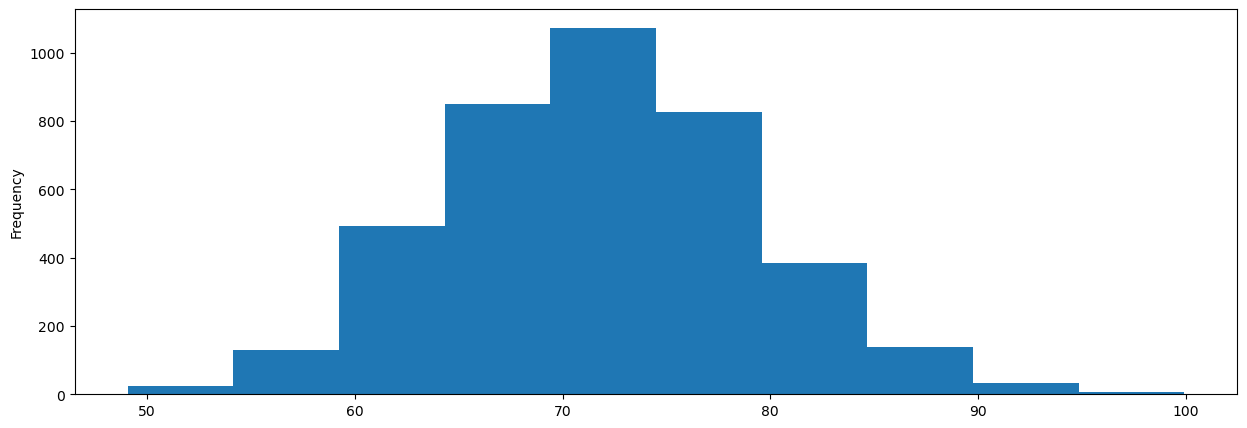

In [31]:
df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] *= 10 
df['collegeGPA'].plot(kind='hist', figsize=(15,5));

<AxesSubplot:xlabel='CollegeCityTier', ylabel='Salary'>

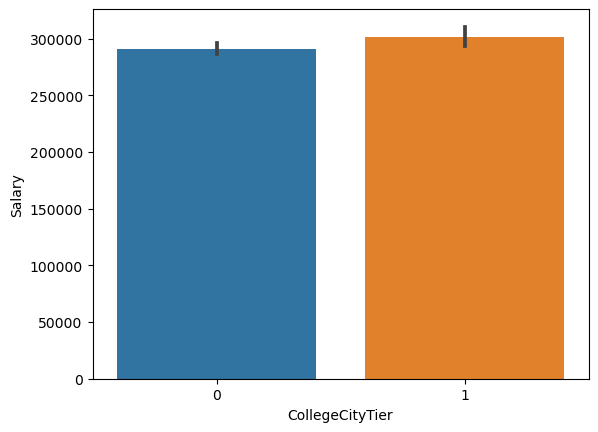

In [32]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df)

## <span style="color:red">Bivariate Analysis</span>

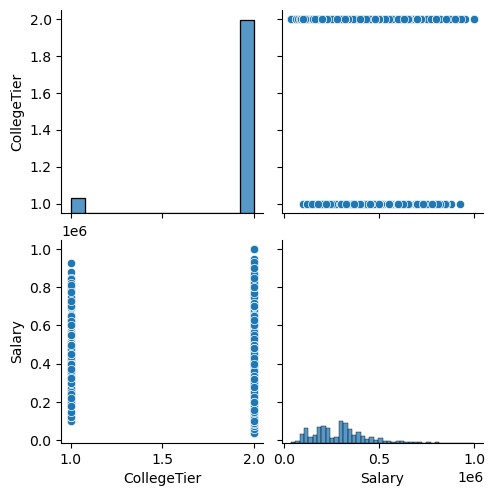

In [33]:
sns.pairplot(df,vars=['CollegeTier', 'Salary'])

* From the graph we observe that collegecitytier 1 has bagged with highest salary , and also to be noted that collegecity tier 0 also provide the same salary expectations

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

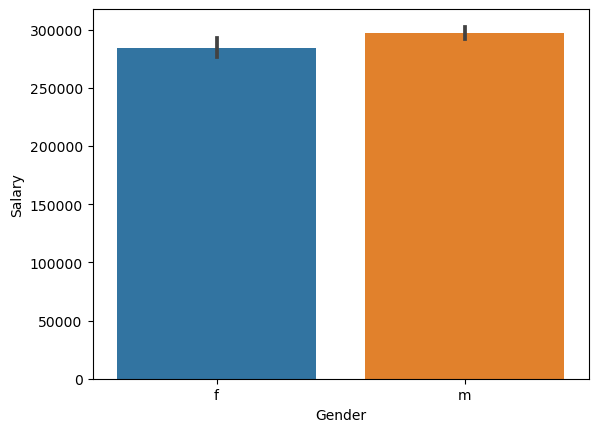

In [34]:
sns.barplot(x='Gender',y='Salary',data=df)

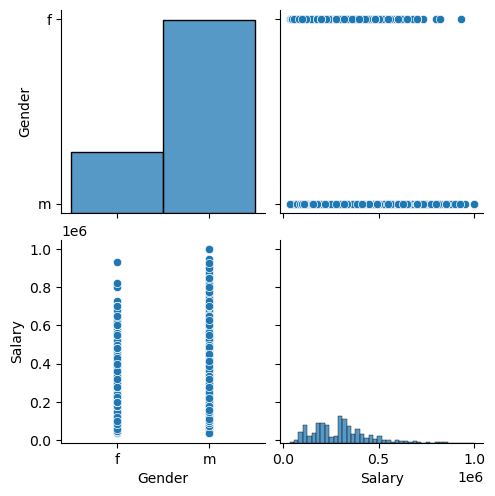

In [35]:
sns.pairplot(df,vars=['Gender', 'Salary'])

In [36]:
l = []
for i in df['Designation']:
    if 'senior' in i and 'engineer' not in i:
        l.append('senior')
    elif 'trainee' in i and 'engineer' not in i:
        l.append('trainee')
    elif 'engineer' in i and 'senior' not in i:
        l.append('engineer')
    elif 'associate' in i and 'senior' not in i:
        l.append('associate')
    elif 'developer' in i and 'senior' not in i:
        l.append('developer')
    elif 'manager' in i and 'senior' not in i:
        l.append('manager')
    elif 'analyst' in i:
        l.append('analyst')
    elif 'consultant' in i:
        l.append('consultant')
    elif 'executive' in i:
        l.append('executive')
    elif 'designer' in i:
        l.append('designer')
    else:
        l.append('others')


In [37]:
df['Designations']=l 
df['Designations'].value_counts()

engineer      1984
developer      663
others         528
analyst        401
manager        119
associate       65
executive       62
trainee         57
senior          41
designer        23
consultant      19
Name: Designations, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'manager'),
  Text(2, 0, 'engineer'),
  Text(3, 0, 'senior'),
  Text(4, 0, 'analyst'),
  Text(5, 0, 'associate'),
  Text(6, 0, 'developer'),
  Text(7, 0, 'executive'),
  Text(8, 0, 'trainee'),
  Text(9, 0, 'consultant'),
  Text(10, 0, 'designer')])

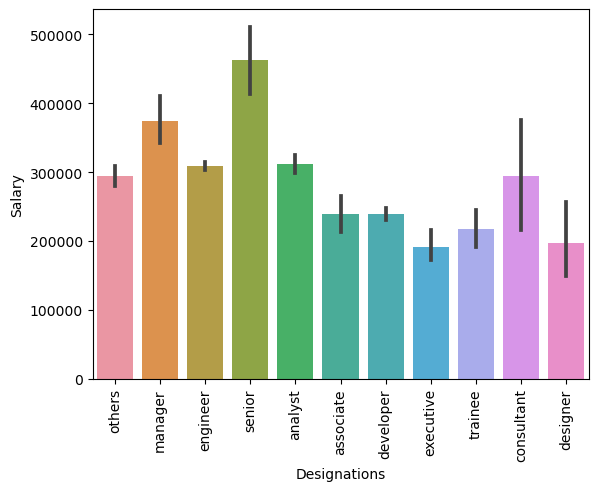

In [38]:
sns.barplot(x='Designations',y='Salary',data=df)
plt.xticks(rotation=90)

<AxesSubplot:>

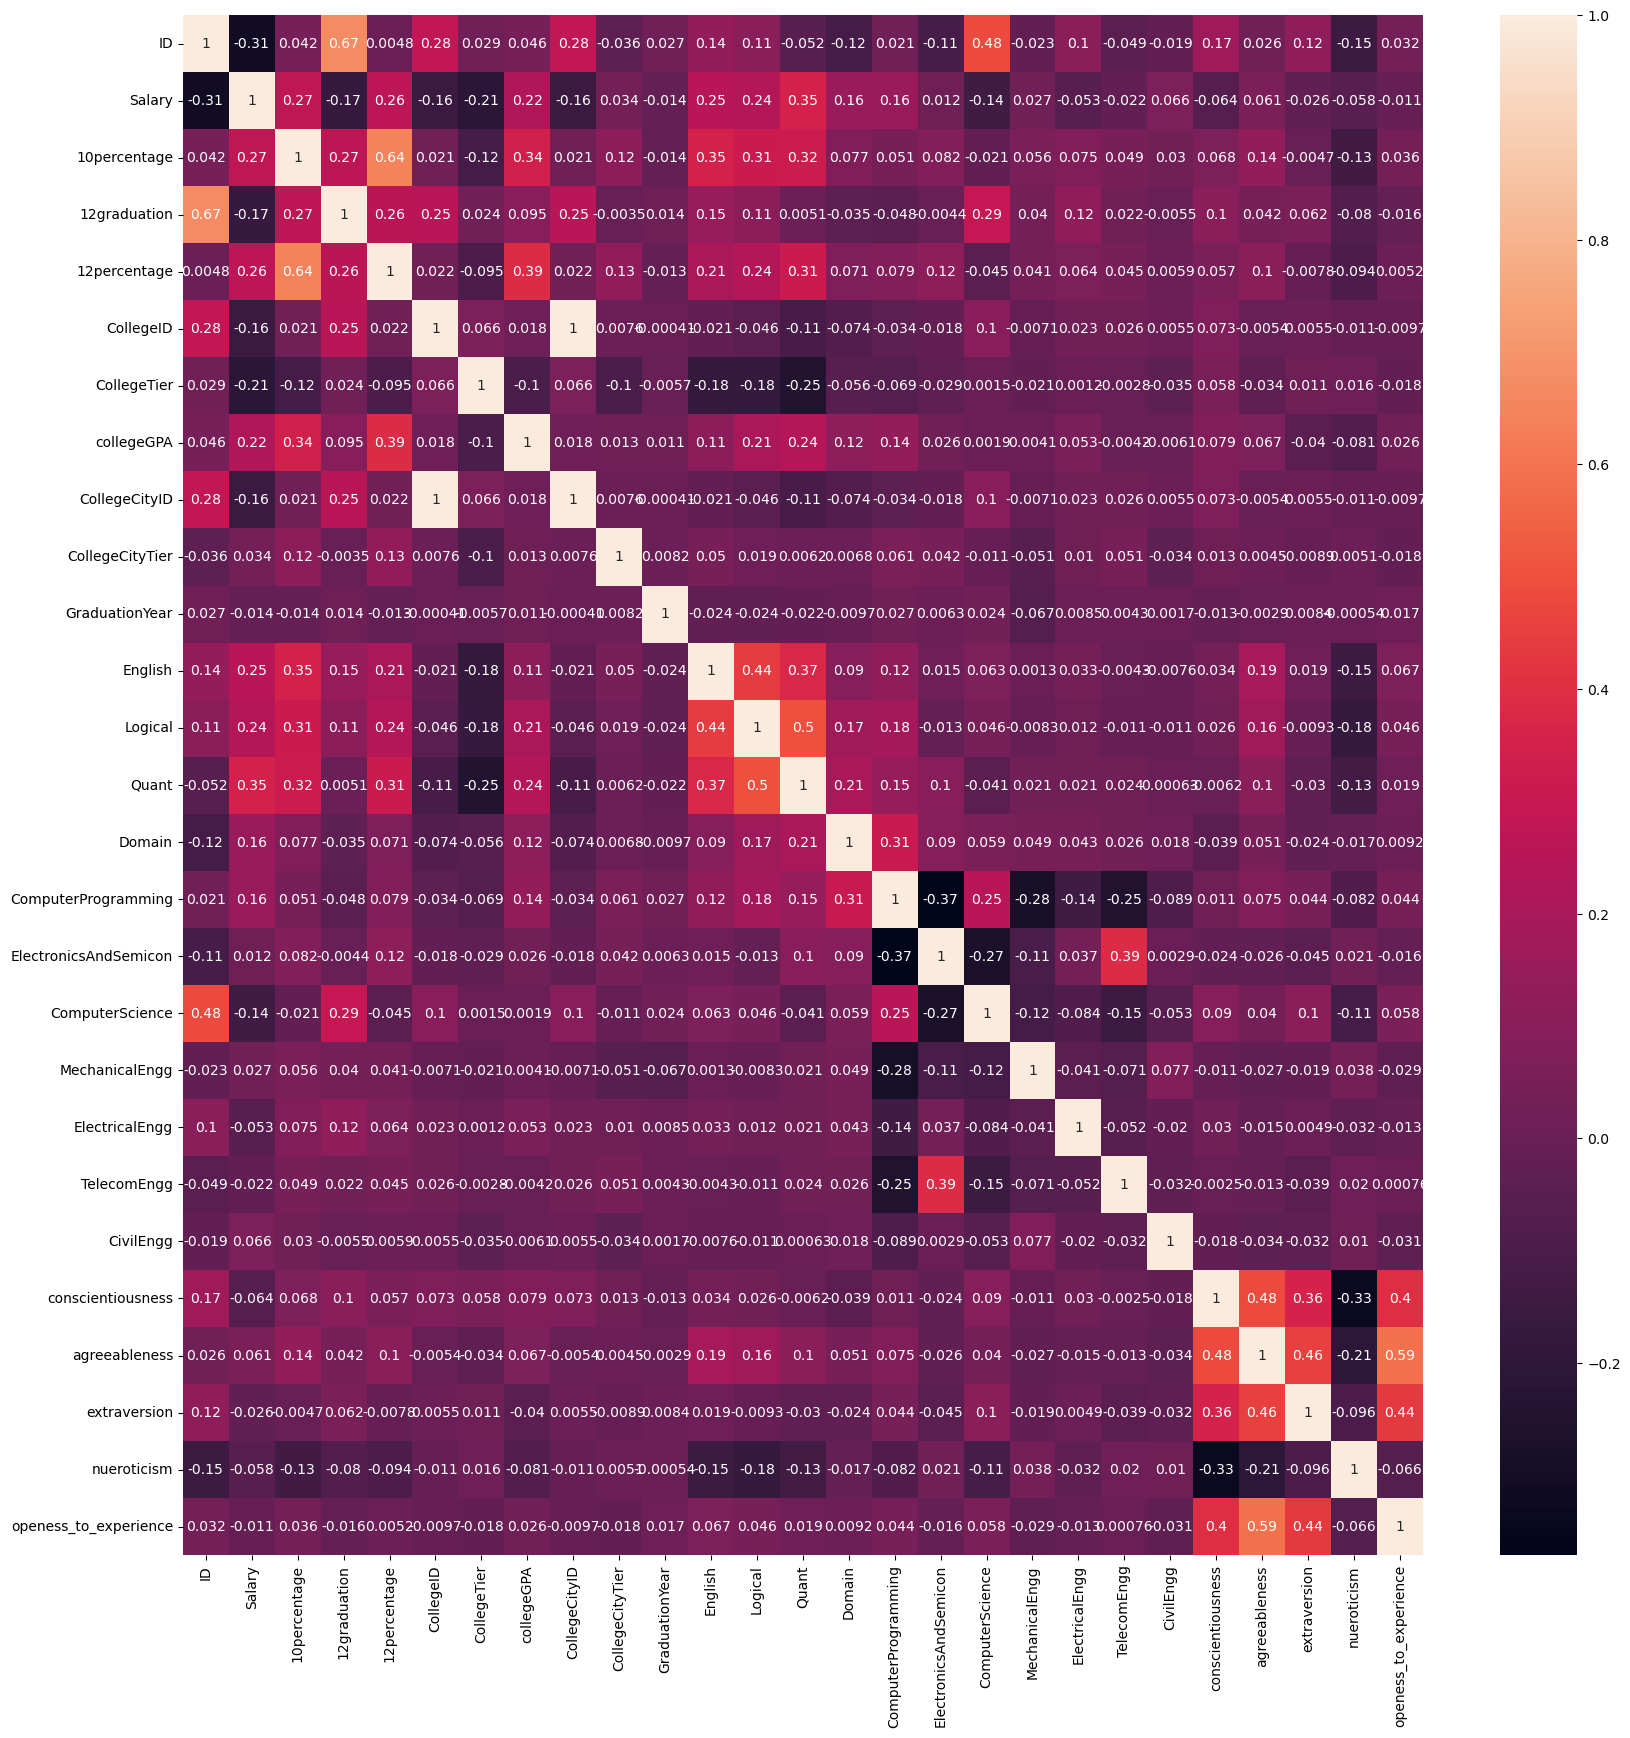

In [39]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True)

## <span style="color:blue">Research Questions</span>

* Research Question 1: Testing the Claim about Computer Science Engineering Jobs
* Research Question 2: Relationship between Gender and Specialization

In [40]:
# Computer Science Engineers with specified job titles
computer_science_jobs = df[(df['Degree'] == 'ComputerScience') & 
                             (df['Designation'].isin(['Programming Analyst', 'Software Engineer', 
                                                        'Hardware Engineer', 'Associate Engineer']))]

In [43]:
# Calculate average salary 
average_salary = computer_science_jobs['Salary'].mean()
average_salary

In [42]:
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
contingency_table

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,internal combustion engine,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering
Gender,,,,,,,,,,,,,,,,,,,,,
f,1,2,0,2,9,0,1,6,0,58,...,0,0,0,10,1,0,0,0,0,1
m,2,7,5,0,6,1,8,23,1,183,...,1,1,5,187,3,2,13,1,1,5
